![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [11]:
# Verificar si hay valores faltantes y tipos de datos
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [12]:
# Eliminar las columnas no numéricas (es decir, 'sex'), al no ser numerico no nos sirve
penguins_numericos = penguins_df.drop(columns=['sex'])

# Manejar valores faltantes eliminando las filas con datos faltantes
penguins_numericos = penguins_numericos.dropna()


In [13]:
# Estandarizar los datos numéricos
escalador = StandardScaler()
penguins_escalados = escalador.fit_transform(penguins_numericos)


In [14]:
# Paso 3: Realizar el clustering
# Determinar un número razonable de clusters, al ser 3 especies le ponemos esa cantidad
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(penguins_escalados)

# Añadir las etiquetas de los clusters a los datos originales por que si lol
penguins_numericos['cluster'] = clusters

In [15]:
# Se calcula las estadísticas por cluster
stat_penguins = penguins_numericos.groupby('cluster').mean()


In [16]:
# Mostrar el DataFrame resultante
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000


In [17]:
import matplotlib.pyplot as plt

# Asignar colores a cada cluster
colores = ['red', 'blue', 'green']
penguins_numericos['color'] = penguins_numericos['cluster'].map(lambda x: colores[x])

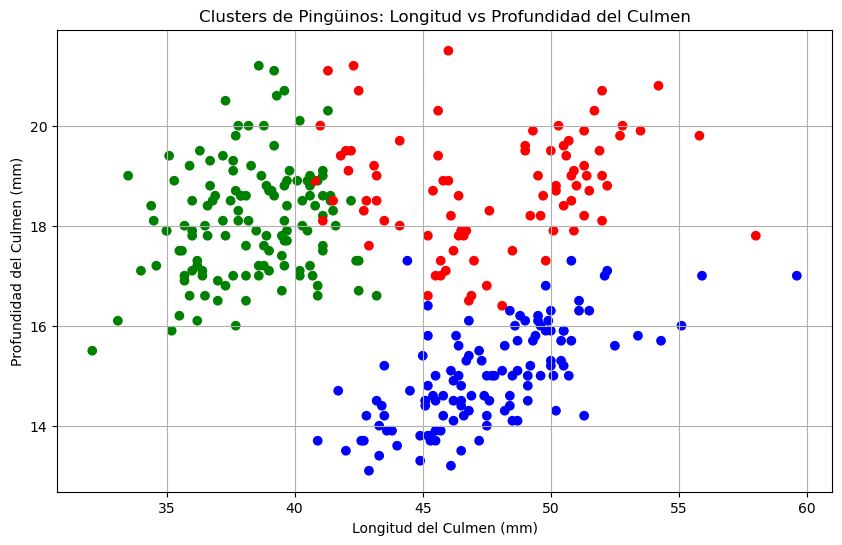

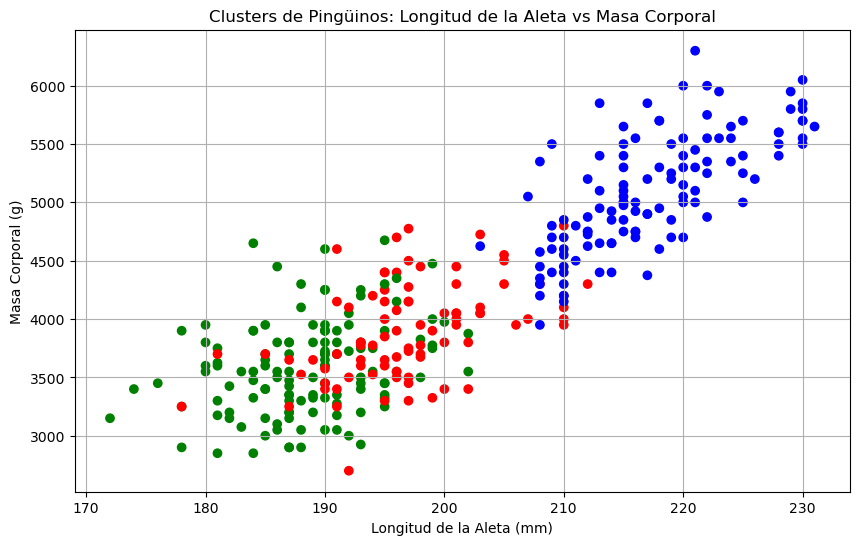

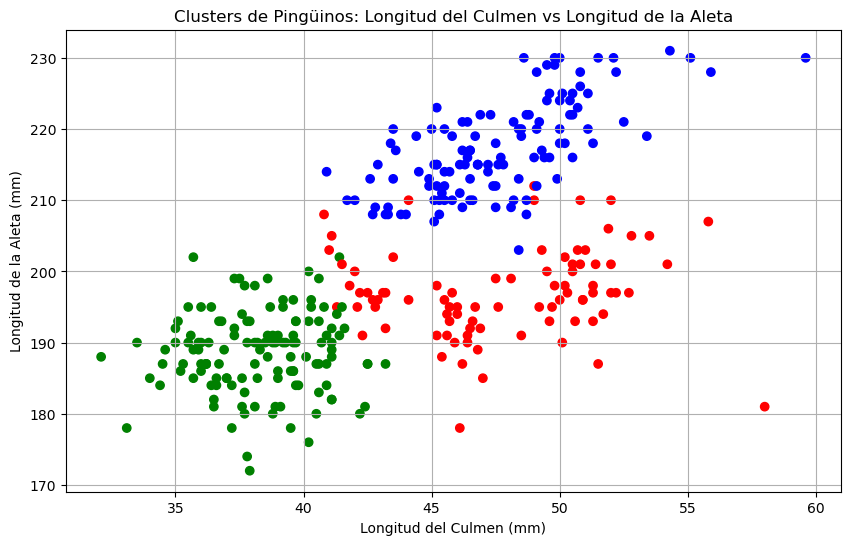

In [18]:
# Gráfico de dispersión para Culmen Length vs Culmen Depth
plt.figure(figsize=(10, 6))
plt.scatter(penguins_numericos['culmen_length_mm'], penguins_numericos['culmen_depth_mm'], c=penguins_numericos['color'])
plt.title('Clusters de Pingüinos: Longitud vs Profundidad del Culmen')
plt.xlabel('Longitud del Culmen (mm)')
plt.ylabel('Profundidad del Culmen (mm)')
plt.grid(True)
plt.show()

# Gráfico de dispersión para Flipper Length vs Body Mass
plt.figure(figsize=(10, 6))
plt.scatter(penguins_numericos['flipper_length_mm'], penguins_numericos['body_mass_g'], c=penguins_numericos['color'])
plt.title('Clusters de Pingüinos: Longitud de la Aleta vs Masa Corporal')
plt.xlabel('Longitud de la Aleta (mm)')
plt.ylabel('Masa Corporal (g)')
plt.grid(True)
plt.show()

# Gráfico de dispersión para Culmen Length vs Flipper Length
plt.figure(figsize=(10, 6))
plt.scatter(penguins_numericos['culmen_length_mm'], penguins_numericos['flipper_length_mm'], c=penguins_numericos['color'])
plt.title('Clusters de Pingüinos: Longitud del Culmen vs Longitud de la Aleta')
plt.xlabel('Longitud del Culmen (mm)')
plt.ylabel('Longitud de la Aleta (mm)')
plt.grid(True)
plt.show()